# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import logging

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [97]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities_title = []

for city in cities:
     cities_title.append(city.title())

In [98]:
# Base query with appid 
base_q = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}"

In [100]:
# Looping through cities for api calls
# and generating print log

Name = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

count = 0
set_count = 1

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        response = requests.get(f"{base_q}&q={city}").json()['name']
        Name.append(response)
        
        response = requests.get(f"{base_q}&q={city}").json()['clouds']['all']
        Cloudiness.append(response)
        
        response = requests.get(f"{base_q}&q={city}").json()['sys']['country']
        Country.append(response)
        
        response = requests.get(f"{base_q}&q={city}").json()['dt']
        Date.append(response)
        
        response = requests.get(f"{base_q}&q={city}").json()['main']['humidity']
        Humidity.append(response)
        
        response = requests.get(f"{base_q}&q={city}").json()['coord']['lat']
        Lat.append(response)
        
        response = requests.get(f"{base_q}&q={city}").json()['coord']['lat']
        Lng.append(response)
        
        response = requests.get(f"{base_q}&q={city}").json()['main']['temp_max']
        Max_Temp.append(response)
        
        response = requests.get(f"{base_q}&q={city}").json()['wind']['speed']
        Wind_Speed.append(response)
        
        print(f"Processing Record {count} of Set {set_count} | {city}")
        
        count += 1
        
        if count > 49:
            count = 0
            set_count += 1
        
    except KeyError:
        
        print("City not found. Skipping...")
        
print("-----------------------------")       
print("Data Retrieval Complete")     
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | shintomi
Processing Record 1 of Set 1 | buin
City not found. Skipping...
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | rincon
Processing Record 7 of Set 1 | miri
Processing Record 8 of Set 1 | salinopolis
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | churapcha
Processing Record 11 of Set 1 | birjand
Processing Record 12 of Set 1 | constitucion
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | arcachon
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | porto novo
Processing Record 17 of Set 1 | leningradskiy
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | collie
City not found. Skipping...
City not found. Skipping...
Processing Record 20 of Set 1 | ilulissat
Proce

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [103]:
# zipping the lists then converting into a dataframe. Added column headers.
df_weather = pd.DataFrame(zip(Name, Cloudiness, Country, Date, Humidity, Lat, Lng, Max_Temp, Wind_Speed))
df_weather.columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']
df_weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Shintomi,75,JP,1571780795,88,32.08,32.08,291.15,2.60
1,Buin,87,CL,1571780796,14,-33.73,-33.73,300.15,8.70
2,Bluff,0,AU,1571780798,68,-23.58,-23.58,291.95,5.83
3,Saldanha,100,PT,1571780800,70,41.42,41.42,283.28,1.07
4,Mar del Plata,0,AR,1571780802,42,-46.43,-46.43,285.40,5.14
...,...,...,...,...,...,...,...,...,...
533,Hargeysa,0,SO,1571781764,65,9.56,9.56,290.29,4.28
534,Karonga,0,MW,1571781765,65,-9.94,-9.94,299.34,1.75
535,Ceres,100,BR,1571781767,74,-15.31,-15.31,298.54,1.35
536,Brokopondo,40,SR,1571781769,66,5.06,5.06,304.15,4.60


In [104]:
# Converted temps from kelvin to fahrenheit
df_weather['Max Temp'] = round(((df_weather['Max Temp'] - 273.15) * (9/5) + 32),2)

In [105]:
# Converted wind speed from kmh to mph
df_weather['Wind Speed'] = round((df_weather['Wind Speed']*1.60934),2)

In [106]:
# Display dataframe
df_weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Shintomi,75,JP,1571780795,88,32.08,32.08,64.40,4.18
1,Buin,87,CL,1571780796,14,-33.73,-33.73,80.60,14.00
2,Bluff,0,AU,1571780798,68,-23.58,-23.58,65.84,9.38
3,Saldanha,100,PT,1571780800,70,41.42,41.42,50.23,1.72
4,Mar del Plata,0,AR,1571780802,42,-46.43,-46.43,54.05,8.27
...,...,...,...,...,...,...,...,...,...
533,Hargeysa,0,SO,1571781764,65,9.56,9.56,62.85,6.89
534,Karonga,0,MW,1571781765,65,-9.94,-9.94,79.14,2.82
535,Ceres,100,BR,1571781767,74,-15.31,-15.31,77.70,2.17
536,Brokopondo,40,SR,1571781769,66,5.06,5.06,87.80,7.40


In [107]:
# Export to csv
df_weather.to_csv(r'weather.csv')

In [108]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 9 columns):
City          538 non-null object
Cloudiness    538 non-null int64
Country       538 non-null object
Date          538 non-null int64
Humidity      538 non-null int64
Lat           538 non-null float64
Lng           538 non-null float64
Max Temp      538 non-null float64
Wind Speed    538 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.0+ KB


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

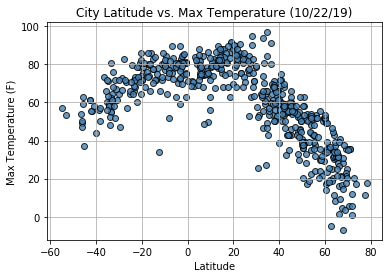

In [121]:
# Lat and Maxt Temp Plot
plt.scatter(df_weather['Lat'], df_weather['Max Temp'], color= 'steelblue', alpha = 0.8, marker='o', edgecolors='black')
plt.title("City Latitude vs. Max Temperature (10/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('..\Images\LatVsMaxTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

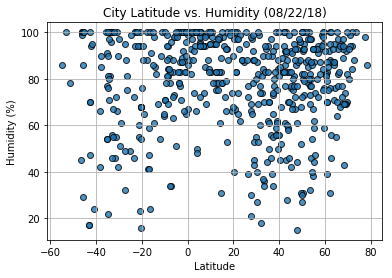

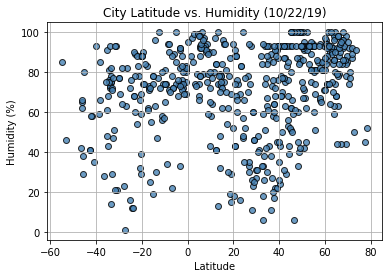

In [122]:
# Lat and humidity
plt.scatter(df_weather['Lat'], df_weather['Humidity'], color= 'steelblue', alpha = 0.8, marker='o', edgecolors='black')
plt.title("City Latitude vs. Humidity (10/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('..\Images\LatVsHumidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

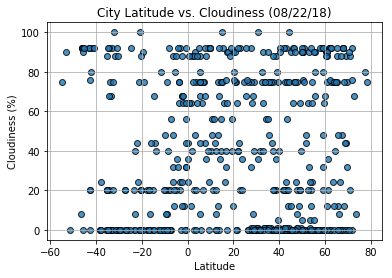

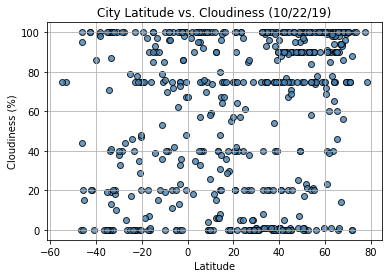

In [123]:
# Lat and cloudinesss
plt.scatter(df_weather['Lat'], df_weather['Cloudiness'], color= 'steelblue', alpha = 0.8, marker='o', edgecolors='black')
plt.title("City Latitude vs. Cloudiness (10/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('..\Images\LatVsCloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

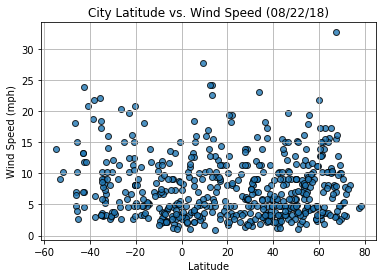

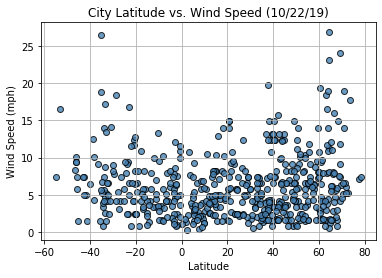

In [124]:
# Lat and wind speed
plt.scatter(df_weather['Lat'], df_weather['Wind Speed'], color= 'steelblue', alpha = 0.8, marker='o', edgecolors='black')
plt.title("City Latitude vs. Wind Speed (10/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('..\Images\LatVsWindSpeed.png')
plt.show()